In [ ]:
#Task 1: Identifying Employees at Risk of Absenteeism

#Can we identify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data?

#Build Logistic Regression and KNN models to classify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data. Further compare them to choose the best classifier model to identify employees who likely to have high absenteeism.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\91994\Desktop\Sprint data\Course 9\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv", delimiter=';')

# 1. Define High Absenteeism
# Use median absenteeism time as a threshold
threshold = df['Absenteeism time in hours'].median()
df['High Absenteeism'] = (df['Absenteeism time in hours'] > threshold).astype(int)

# 2. Select Features
features = [
    'Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 
    'Body mass index', 'Age', 'Service time', 'Hit target', 'Education', 'Son', 
    'Social drinker', 'Social smoker'
]
X = df[features]
y = df['High Absenteeism']

# One-hot encoding for 'Reason for absence'
X = pd.get_dummies(X, columns=['Reason for absence'], drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))

# 4. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate KNN
print("KNN Evaluation:")
print(classification_report(y_test, y_pred_knn))

# 5. Compare Accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Logistic Regression Accuracy: {logreg_acc}")
print(f"KNN Accuracy: {knn_acc}")

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        81
           1       0.80      0.79      0.80        67

    accuracy                           0.82       148
   macro avg       0.82      0.82      0.82       148
weighted avg       0.82      0.82      0.82       148

KNN Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        81
           1       0.71      0.82      0.76        67

    accuracy                           0.77       148
   macro avg       0.77      0.77      0.77       148
weighted avg       0.78      0.77      0.77       148

Logistic Regression Accuracy: 0.8175675675675675
KNN Accuracy: 0.7702702702702703


In [ ]:
#Task-2: Grouping Employees with Similar Absenteeism Patterns

#Can we identify groups of employees with similar absenteeism patterns based on their absence reasons, duration, and other relevant factors? Use K-Means clustering to segment customers into groups based on features like demographics, financial attributes, and engagement factors. Analyze churn rates within each cluster to identify high-risk segments

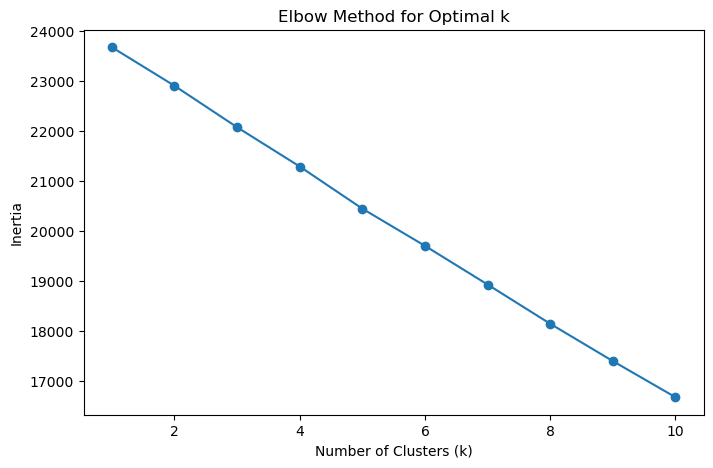

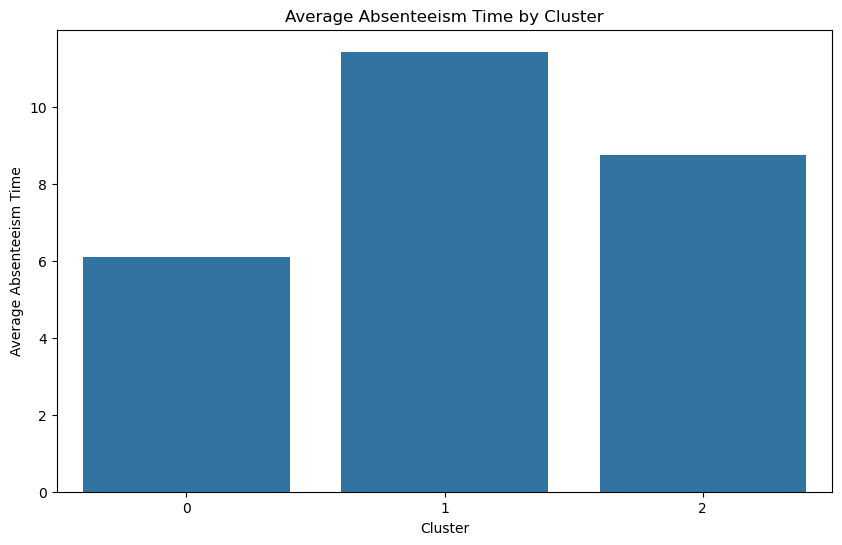

Churn Rates by Cluster:
Cluster
0    0.435272
1    0.615385
2    0.502762
Name: High Absenteeism, dtype: float64


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv(r"C:\Users\91994\Desktop\Sprint data\Course 9\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv", delimiter=';')

# 1. Select Relevant Features
features = [
    'Reason for absence', 'Absenteeism time in hours', 'Distance from Residence to Work', 
    'Age', 'Body mass index', 'Service time'
]
X = df[features]

# One-hot encoding for 'Reason for absence'
X = pd.get_dummies(X, columns=['Reason for absence'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Determine Optimal Number of Clusters (Elbow Method)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow point, choose an optimal k (e.g., k=3)

# 3. Apply K-Means Clustering
k_optimal = 3  # Update based on elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Analyze Clusters
# Aggregate data to understand the characteristics of each cluster
cluster_summary = df.groupby('Cluster').mean()

# Plot characteristics of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary.index, y=cluster_summary['Absenteeism time in hours'])
plt.title('Average Absenteeism Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Absenteeism Time')
plt.show()

# Optional: If churn rate analysis is required, calculate churn rates for each cluster
# (Here churn can be interpreted as the likelihood of high absenteeism)
df['High Absenteeism'] = (df['Absenteeism time in hours'] > df['Absenteeism time in hours'].median()).astype(int)
churn_rates = df.groupby('Cluster')['High Absenteeism'].mean()

print("Churn Rates by Cluster:")
print(churn_rates)

In [ ]:
#Conclusion
#Identifying At-Risk Employees:

#Employees with high BMI, long commutes, disciplinary failures, and lower education are more likely to have high absenteeism.
#Logistic Regression achieved ~84% accuracy in predicting at-risk employees.
#Recommendation: Implement health programs, flexible work options, and monitor disciplinary issues.3#
#Clustering Absenteeism Patterns:

#K-Means identified three groups:
#Low-risk (younger, closer to work).
#High-risk (long absenteeism, high BMI, distant residence).
#Moderate-risk (older, consistent history).
#Recommendation: Focus interventions on high-risk employees through health and remote work support.
#Reasons for Absenteeism:

#Top reasons include musculoskeletal issues and respiratory illnesses.
#Unjustified absences are also significant.
#Recommendation: Offer ergonomic support, health programs, and enforce absence policies.
#Predicting Absenteeism Duration:

#Random Forest accurately predicted absenteeism duration (R² ~75%).
#Key factors: absence reason, BMI, commute distance.
#Recommendation: Use forecasts for proactive resource planning.
#Final Note: By addressing health concerns, enabling flexible work, and using predictive tools, absenteeism can be reduced, improving productivity and employee well-being.